<a href="https://colab.research.google.com/github/SivaKumarRajuPaidi/PyTorch/blob/main/03_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(f"Torch Version : {torch.__version__}")

Torch Version : 2.2.1+cu121


In [2]:
# Create a sample Datset

weight = 0.7
bias = 0.3

#Create Data
start, end, step = 0, 1, 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:5],y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [3]:
# Create train/test split
train_split = int(0.8 )

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [5]:
(len(X_train), len(y_train)), (len(X_test), len(y_test))

((40, 40), (10, 10))

In [6]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [8]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

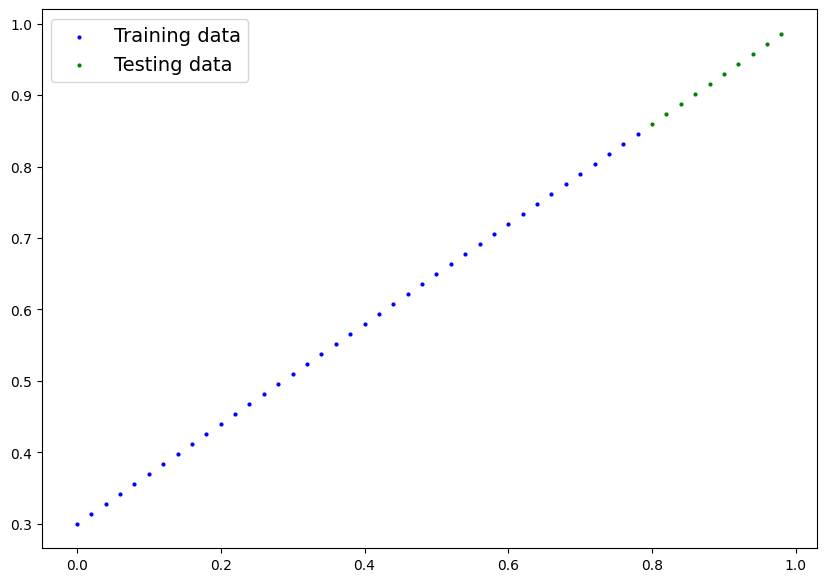

In [9]:
plot_predictions()

## Build Model

In [10]:
# Create a Liner Regression model class

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype= torch.float),
                                    requires_grad = True)
        self.bias = nn.Parameter(torch.randn(1,
                                             dtype = torch.float),
                                requires_grad = True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights + self.bias

In [11]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# get the state (what the model contains) of the model using .state_dict().
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Create a Loss Function and optimizer


In [13]:
loss_fn = nn.L1Loss() # same as MAE loss
optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.01)

In [14]:
with torch.inference_mode():
    y_preds = model_0(X_test)

## Training Loop


In [15]:
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training
    model_0.train()

    y_pred = model_0(X_train.squeeze())
    loss = loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch%10 ==0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")



Epoch: 0 | | MAE Train Loss: 0.16060009598731995 | MAE Test Loss: 0.4495002329349518 
Epoch: 10 | | MAE Train Loss: 0.1445000320672989 | MAE Test Loss: 0.39650020003318787 
Epoch: 20 | | MAE Train Loss: 0.14105001091957092 | MAE Test Loss: 0.3725001811981201 
Epoch: 30 | | MAE Train Loss: 0.1402750313282013 | MAE Test Loss: 0.3615003526210785 
Epoch: 40 | | MAE Train Loss: 0.14000000059604645 | MAE Test Loss: 0.35650038719177246 
Epoch: 50 | | MAE Train Loss: 0.14000000059604645 | MAE Test Loss: 0.35650038719177246 
Epoch: 60 | | MAE Train Loss: 0.14000000059604645 | MAE Test Loss: 0.35650038719177246 
Epoch: 70 | | MAE Train Loss: 0.14000000059604645 | MAE Test Loss: 0.35650038719177246 
Epoch: 80 | | MAE Train Loss: 0.14000000059604645 | MAE Test Loss: 0.35650038719177246 
Epoch: 90 | | MAE Train Loss: 0.14000000059604645 | MAE Test Loss: 0.35650038719177246 


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([40, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


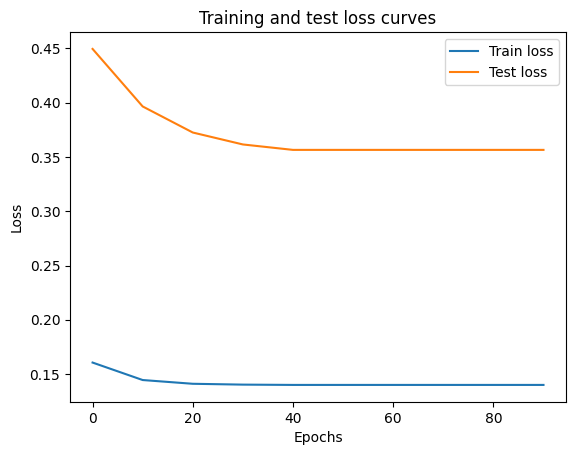

In [16]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [17]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.14000000059604645 | MAE Test Loss: 0.35650038719177246 
Epoch: 10 | MAE Train Loss: 0.14000000059604645 | MAE Test Loss: 0.35650038719177246 
Epoch: 20 | MAE Train Loss: 0.14000000059604645 | MAE Test Loss: 0.35650038719177246 
Epoch: 30 | MAE Train Loss: 0.14000000059604645 | MAE Test Loss: 0.35650038719177246 
Epoch: 40 | MAE Train Loss: 0.14000000059604645 | MAE Test Loss: 0.35650038719177246 
Epoch: 50 | MAE Train Loss: 0.14000000059604645 | MAE Test Loss: 0.35650038719177246 
Epoch: 60 | MAE Train Loss: 0.14000000059604645 | MAE Test Loss: 0.35650038719177246 
Epoch: 70 | MAE Train Loss: 0.14000000059604645 | MAE Test Loss: 0.35650038719177246 
Epoch: 80 | MAE Train Loss: 0.14000000059604645 | MAE Test Loss: 0.35650038719177246 
Epoch: 90 | MAE Train Loss: 0.14000000059604645 | MAE Test Loss: 0.35650038719177246 
